In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install keras
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
sns.set(color_codes=True)
df = pd.read_excel("../techlabs-elective/realtor.spring.2020.xlsx")
df.head(10)

,sold.price,zip.code,overview,type,year.built,num.beds,num.baths,living.area,lot.area,masterbedroom.length,masterbedroom.width,kitchen.length,kitchen.width,rand
0,3000000.0,2108,\n Property Overview - Beacon Hill gr...,Condo/Townhome/Row Home/Co-Op,1899,2,1.5,2352,NaN,15.0,15.0,12.0,10.0,0.001732
1,1150000.0,2476,\n Property Overview - Quality builde...,Single Family Home,1959,4,3.5,2713,6890.00,17.0,11.0,25.0,12.0,0.003026
2,1095000.0,1890,\n Property Overview - This surprisin...,Single Family Home,1960,4,3.5,2821,0.36,20.0,19.0,25.0,16.0,0.004115
3,689000.0,2118,\n Property Overview - Sound End Styl...,Condo/Townhome/Row Home/Co-Op,1855,1,1.0,595,NaN,13.0,12.0,8.0,8.0,0.004413
4,842700.0,2492,\n Property Overview - Welcome to thi...,Single Family Home,1974,3,2.0,1476,0.23,11.0,15.0,11.0,12.0,0.013653
5,300000.0,2467,\n Property Overview - This is a grea...,Condo/Townhome/Row Home/Co-Op,1955,2,1.0,780,NaN,12.0,12.0,13.0,9.0,0.014122
6,840000.0,2130,\n Property Overview - This beautiful...,Condo/Townhome/Row Home/Co-Op,1910,3,2.0,1133,1133.00,14.0,11.0,12.0,12.0,0.015632
7,751000.0,2472,\n Property Overview - Immaculate 3 b...,Single Family Home,1950,3,2.5,2003,5000.00,15.0,15.0,11.0,13.0,0.022707
8,730000.0,1945,\n Property Overview - Multiple Offer...,Single Family Home,1935,5,2.5,2967,7565.00,22.0,13.0,23.0,16.0,0.023967
9,580000.0,2128,\n Property Overview - Multiple offer...,Condo/Townhome/Row Home/Co-Op,2012,3,2.0,1417,NaN,15.0,14.0,12.0,17.0,0.025222


In [50]:
df['sold.price'] = df['sold.price'].fillna((df['sold.price'].mean()))

In [51]:
df.drop(df.columns[[2,3,8]], axis=1, inplace=True)
df.head()

,sold.price,zip.code,year.built,num.beds,num.baths,living.area,masterbedroom.length,masterbedroom.width,kitchen.length,kitchen.width,rand
0,3000000.0,2108,1899,2,1.5,2352,15.0,15.0,12.0,10.0,0.001732
1,1150000.0,2476,1959,4,3.5,2713,17.0,11.0,25.0,12.0,0.003026
2,1095000.0,1890,1960,4,3.5,2821,20.0,19.0,25.0,16.0,0.004115
3,689000.0,2118,1855,1,1.0,595,13.0,12.0,8.0,8.0,0.004413
4,842700.0,2492,1974,3,2.0,1476,11.0,15.0,11.0,12.0,0.013653


In [253]:
# Create scaler: scaler
scaler = MinMaxScaler()

In [254]:
# Create a PCA instance: pca
pca = PCA()

In [255]:
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

In [256]:
# Fit the pipeline to 'df'
pipeline.fit(df)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA())])

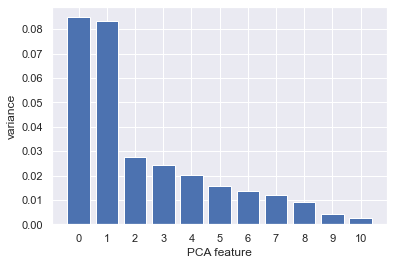

In [257]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [234]:
# Create a PCA model with 6 components: pca
pca = PCA(n_components=6)

# Fit the PCA instance to df
pca.fit(df)

# Transform df: df
df2 = pca.transform(df)

# Print the shape of pca_features
print(pca_features.shape)

(566, 6)


In [52]:
df.drop(df.columns[[6, 7, 8, 9,10]], axis=1, inplace=True)
df.head()

,sold.price,zip.code,year.built,num.beds,num.baths,living.area
0,3000000.0,2108,1899,2,1.5,2352
1,1150000.0,2476,1959,4,3.5,2713
2,1095000.0,1890,1960,4,3.5,2821
3,689000.0,2118,1855,1,1.0,595
4,842700.0,2492,1974,3,2.0,1476


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sold.price   566 non-null    float64
 1   zip.code     566 non-null    int64  
 2   year.built   566 non-null    int64  
 3   num.beds     566 non-null    int64  
 4   num.baths    566 non-null    float64
 5   living.area  566 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 26.7 KB


In [54]:
y=df['sold.price'].values
X=df.drop('sold.price', axis=1).values

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
X_scale = scaler.fit_transform(X)

In [7]:
#create training and test sets 
X_train, X_test_and_val, y_train, y_test_and_val = train_test_split(X_scale, y, test_size = 0.3, random_state=42)

In [8]:
#import gradientboosting
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 3, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [9]:
#fit the data
clf.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=500)

In [306]:
#test the accuracy
clf.score(X_test,y_test)

0.41912784560256067

In [293]:
#create val and test set
X_val, X_test, y_val, y_test = train_test_split(X_test_and_val, y_test_and_val, test_size = 0.5) 


In [123]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(396, 5) (85, 5) (85, 5) (396,) (85,) (85,)


In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [56]:
X, y = make_classification(n_samples=100, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

In [81]:
clf = MLPClassifier(hidden_layer_sizes=(20,), random_state=42, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test)

C:\Users\Lukas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[0.0687831 , 0.9312169 ],
       [0.11100859, 0.88899141],
       [0.04910201, 0.95089799],
       [0.8464881 , 0.1535119 ],
       [0.03875396, 0.96124604],
       [0.8151489 , 0.1848511 ],
       [0.89694092, 0.10305908],
       [0.04444284, 0.95555716],
       [0.04194248, 0.95805752],
       [0.03775189, 0.96224811],
       [0.88662797, 0.11337203],
       [0.12810745, 0.87189255],
       [0.77271686, 0.22728314],
       [0.94391995, 0.05608005],
       [0.76572994, 0.23427006],
       [0.93571507, 0.06428493],
       [0.65750002, 0.34249998],
       [0.26346573, 0.73653427],
       [0.99550362, 0.00449638],
       [0.97890212, 0.02109788],
       [0.95945505, 0.04054495],
       [0.98380252, 0.01619748],
       [0.86446393, 0.13553607],
       [0.99623677, 0.00376323],
       [0.01036135, 0.98963865]])

In [63]:
clf.predict(X_test)

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1])

In [82]:
clf.score(X_test, y_test)

0.92

In [83]:
print(clf(2))

TypeError: 'MLPClassifier' object is not callable